何回の学習をしますか？ 5000


データ5000件の学習が終わりました。


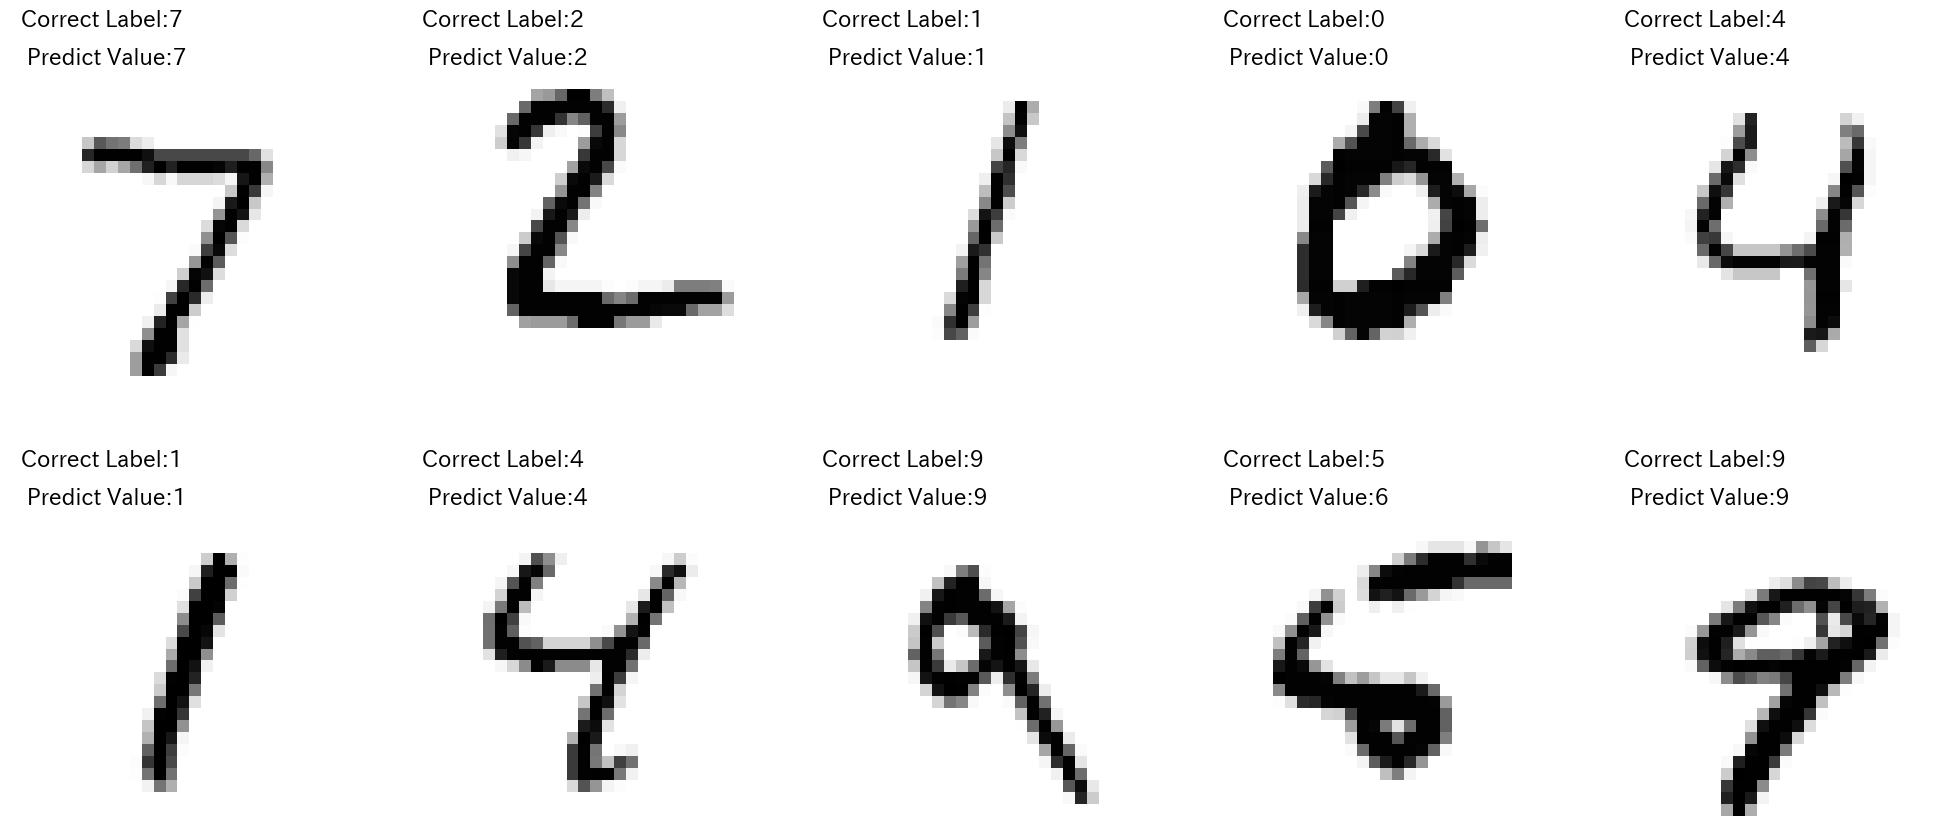

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
#from IPython.core.display import display, HTML
#display(HTML("<style>div.output_scroll { height: unset; }</style>"))
import matplotlib.animation as animation
import time
import japanize_matplotlib


from pylab import rcParams
rcParams['figure.figsize'] = 25,20

i_nodes=784
h_nodes = 300
o_nodes=10

f= pd.read_csv('mnist_train_10000.csv', encoding='ms932', sep=',',header=None)

data=f.values
index = np.arange(len(f))
np.random.shuffle(index)


no_of_trains=int(input('何回の学習をしますか？'))
train_index = index[:no_of_trains]

input_data = np.asfarray(data[train_index,1:]) / 255.0 
print('データ'+str(no_of_trains)+'件の学習が終わりました。')
	
	
# create the target output values (all 0.01, except the desired label which is 0.99)
correct_label = np.zeros((no_of_trains,o_nodes)) 

for i,index in enumerate(data[train_index,0]):
	correct_label[i,index] = 1.0 


w_z=(np.random.rand(h_nodes,o_nodes)-0.51)/o_nodes
w_y=(np.random.rand(i_nodes, h_nodes) - 0.51)/h_nodes

learningRate = 0.1
for x,t in zip(input_data,correct_label):
	
	x = x.reshape(1, len(x))
	# foward propagation
	
	y_in = np.dot(x,w_y)
	y_out = 1/(1+np.exp(-y_in))
	z_in = np.dot(y_out, w_z)	 
	z_out = np.exp(z_in)/np.sum(np.exp(z_in), axis=1, keepdims=True) 
	
	
	delta_l =  z_out - t   
	grad_w_z = np.dot(y_out.T, delta_l)
	delta_n = np.sum(delta_l*w_z, axis=1)
	delta_n = delta_n.reshape(1,len(delta_n))
	delta_n = delta_n*(1-y_out)*y_out
	#delta_n = np.dot(delta_l,w_z.T )*(1-y_out)*y_out #別解
	grad_w_y = np.dot(x.T, delta_n)
	
	
	# gradient descent
	w_z -= learningRate * grad_w_z
	w_y -= learningRate * grad_w_y
	
f= pd.read_csv('mnist_test_10.csv', encoding='ms932', sep=',',header=None)
f=f.values
x = np.asfarray(f[:,1:]) / 255.0
correct_label = f[:,0]

y_in = np.dot(x,w_y)
y_out = 1/(1+np.exp(-y_in))
z_in = np.dot(y_out, w_z)
z_out = np.exp(z_in)/np.sum(np.exp(z_in), axis=1, keepdims=True) 
y_in = np.dot(x,w_y)

fig=plt.figure()

for i,(xx,zz,c) in enumerate(zip(x,z_out,correct_label)):
	
	image_array=np.asfarray(xx).reshape((28,28))
	ax = fig.add_subplot(2,5,i+1)
	ax.imshow(image_array,cmap='Greys',interpolation='None')
	ax.axis("off")
	label = np.argmax(zz)
	ax.text(0.4,0.4, 'Correct Label:'+ str(c)+'\n Predict Value:'+str(label), size = 16,linespacing = 2)
plt.subplots_adjust(wspace=None, hspace=-0.6)	
plt.show()
   

	